# Dimensionality Reduction Using PCA

- It is a technique used to reduce the number of features in a dataset while preserving as mu ch information as possible.
- Advantages:
    - Improving computational efficiency: Having less features can improve the speed of the ML algorithm
    - Visualizing The Data: Multi-dimensional data is hard or impossible to visualize in one plot. Dimensionality Reduction can summarize all the features into 2 features (X and Y axes)
    - Reducing noise: by reducing the complexity and detailed information
    - Improving model performance: minimizing overfitting
- Types:
    - PCA (Principal Component Analysis) 
        - It looks for a new set of features that are linear combinations of the original features
        - These features are called **Principal Components**
        - The first component captures the most variance in the data and the second component captures the second level of variance and so on...
    - t-SNE (t-distributed Stochastic Neighbor Embedding)
        - It is a non-linear dimensionality reduction 
        - It helps with the local structure of the data
    - UMAP
        - Similar to t-SNE, but faster
    - Autoencoders
        - They are neural networks that are trained to reconstruct the data
        - They are becoming popular as they are used in Transform architecture for GenAI

## PCA

![PCA](https://www.sc-best-practices.org/_images/dimensionality_reduction.jpeg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
cancer_data = load_breast_cancer()
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
# integrate the data elements into a df
X = pd.DataFrame(data=cancer_data['data'], columns=cancer_data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


> NOTE: It's highly recommended to standardize the data before performing PCA.

### Step 1: Standardize The Data

In [5]:
SS = StandardScaler()
X_scaled = SS.fit_transform(X)
X_scaled[:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

### Step 2: Apply PCA

In [6]:
X_scaled.shape

(569, 30)

We're going to reduce the number of features fro 30 to 2

In [7]:
# define the number of comp = 2
pca_model_2 = PCA(n_components=2)

In [8]:
X_scaled_2_pca = pca_model_2.fit_transform(X_scaled)

In [9]:
X_scaled_2_pca[:4]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912]])

In [10]:
print('Before PCA:\t', X_scaled.shape[1], 'dimensions')
print('After PCA:\t', X_scaled_2_pca.shape[1], 'dimensions')

Before PCA:	 30 dimensions
After PCA:	 2 dimensions


### PCA Explained Variance Analysis

- The Explained Variance Analysis helps choose the optimal number of Principal Components for Dimensionality Reduction
- Steps:
    1. Build PCA for max number of components (the original number of features)
    2. Fit the data
    3. Calculate the cumulative sum (running total) of the **Explained Variance Ratio (EVR) **
    4. Plot the result
    5. Choose the optimal value where the curve is closer to 1 and starts to flatten.

In [22]:
#step 1
pca_model_full = PCA()

#step 2
pca_model_full.fit(X_scaled)

#step 3
pca_evr = pca_model_full.explained_variance_ratio_
pca_evr_cumsum = np.cumsum(pca_evr)

Tabular Evaluation

In [23]:
df_pca_evr = pd.DataFrame({'PrincipalComponent': range(1,31),
                           'PrincipalComponentEVR':pca_evr,
                            'PrincipalComponentCumSumEVR': pca_evr_cumsum})
df_pca_evr

,PrincipalComponent,PrincipalComponentEVR,PrincipalComponentCumSumEVR
0,1,0.442720,0.442720
1,2,0.189712,0.632432
2,3,0.093932,0.726364
3,4,0.066021,0.792385
4,5,0.054958,0.847343
5,6,0.040245,0.887588
6,7,0.022507,0.910095
7,8,0.015887,0.925983
8,9,0.013896,0.939879
9,10,0.011690,0.951569


Visual Evaluation

In [13]:
plt.style.use('ggplot')


''

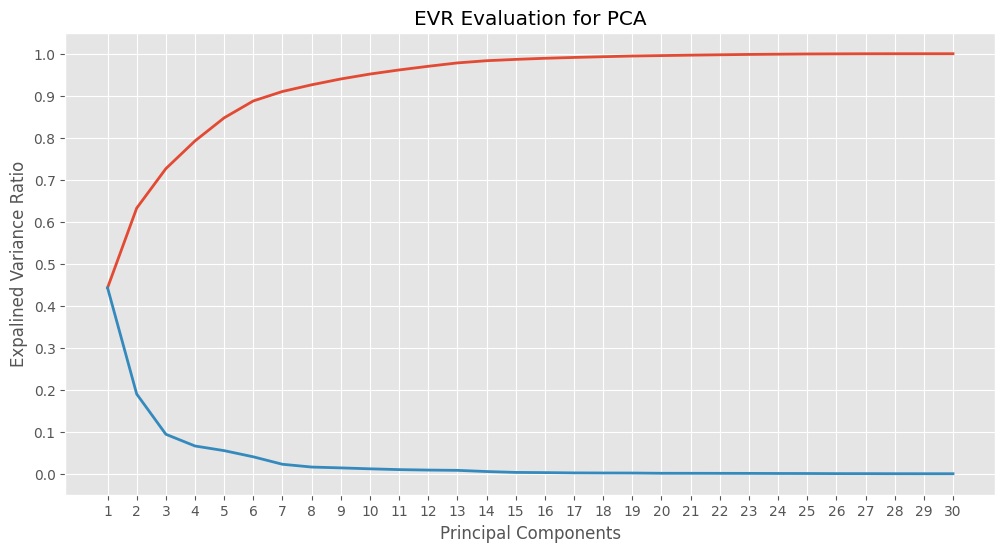

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df_pca_evr['PrincipalComponent'], df_pca_evr['PrincipalComponentCumSumEVR'], linewidth=2)
plt.plot(df_pca_evr['PrincipalComponent'], df_pca_evr['PrincipalComponentEVR'], linewidth=2)

plt.xticks(df_pca_evr['PrincipalComponent'])
plt.title('EVR Evaluation for PCA')
plt.xlabel('Principal Components')
plt.ylabel('Expalined Variance Ratio')
plt.yticks(np.arange(0,1.1,.1))
;

- The analysis above shows that as we increase the number of PC, we get better EVR (closer to 1 or 100% explained variance)
- Choosing the best numberof PCs depends on multiple factors with trade-offs: 
    - **High EVR vs Less Number of Components for better performance**
    - Less Variance doesn't always mean bad PCA because sometimes it reduces the noise in the data, which leads to reducing overfitting
    - The goal here is to get the highest number of variance possible with the lowest number of features for system performance optimization
- Suggested PCs count: 8 to 16

## Visualize PCA Results for 2 components

In [15]:
X_scaled_2_pca[:4] #top 4 rows of the 2-PC array

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912]])

Text(0, 0.5, 'Second Principal Component')

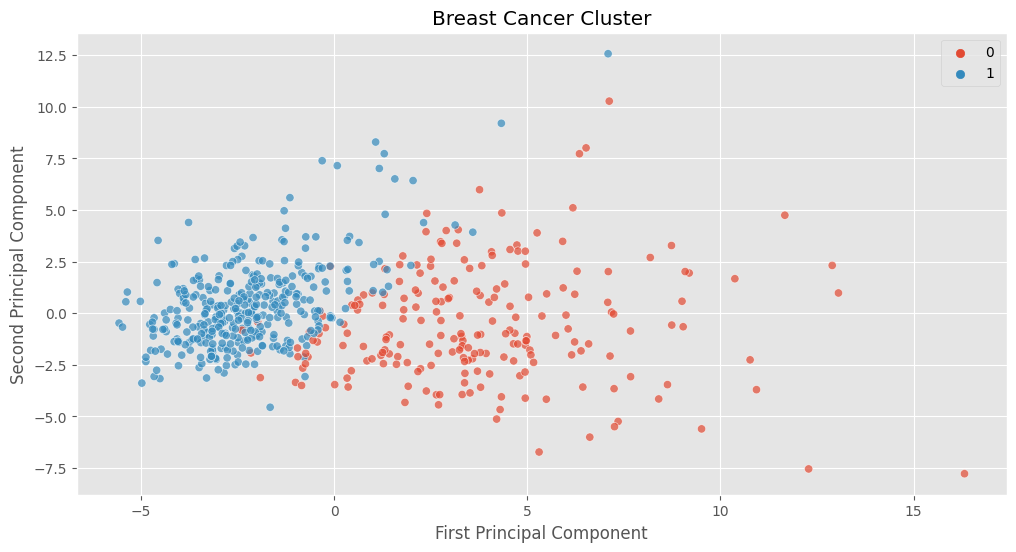

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=X_scaled_2_pca[:,0], y=X_scaled_2_pca[:,1], hue=cancer_data['target'], alpha=0.7) #using seaborn is easier than matplot

plt.title('Breast Cancer Cluster')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [17]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

First PC: 'mean radius', 'radius error', 'perimeter error'
Second PC: 'worst compactness', 'worst concavity'

## PCA Loadings

- They are used to understand the relationship between the original features in the dataset and the newly built PCs
- They help interpret how much each "original" feature contributes to each PC
- Loadings analysis generates the **Loadings Matrix**

In [18]:
# calculate the loadings
pca_2_loadings = pca_model_2.components_

print('Loadings of PC 1:\n',pca_2_loadings[0])
print('Loadings of PC 2:\n',pca_2_loadings[1])

Loadings of PC 1:
 [0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
Loadings of PC 2:
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


In [19]:
# build a loadings matrix

loadings_matrix = pd.DataFrame(pca_2_loadings, columns=X.columns).T
loadings_matrix.columns = ['PC1', 'PC2']
loadings_matrix

,PC1,PC2
mean radius,0.218902,-0.233857
mean texture,0.103725,-0.059706
mean perimeter,0.227537,-0.215181
mean area,0.220995,-0.231077
mean smoothness,0.142590,0.186113
mean compactness,0.239285,0.151892
mean concavity,0.258400,0.060165
mean concave points,0.260854,-0.034768
mean symmetry,0.138167,0.190349
mean fractal dimension,0.064363,0.366575


In [20]:
loadings_matrix.max()

PC1    0.260854
PC2    0.366575
dtype: float64

In [28]:
# Get the highest 3 values of loadings for each component
top_loadings = loadings_matrix.apply(lambda x: x.abs().nlargest(3).index, axis=0)

# Add the corresponding values
top_values = loadings_matrix.apply(lambda x: x.nlargest(3).values, axis=0)


In [30]:
top_loadings

,PC1,PC2
0,mean concave points,mean fractal dimension
1,mean concavity,fractal dimension error
2,worst concave points,worst fractal dimension


In [31]:
top_values

,PC1,PC2
0,0.260854,0.366575
1,0.258400,0.280092
2,0.250886,0.275339
